In [21]:
import pandas as pd
import json

In [22]:
with open('data_week8.json', 'r', encoding='utf8') as f:
    data = json.load(f)
data

[{'index': 221,
  'prod_name': 'Amazon echo dot',
  'review_head': 'Awesome.  It helps a lot',
  'review_body': 'At first, I was reluctant to talk to a hockey puck.  Okay so I am old fashioned.   I use smart sockets in some areas in my home.  I have them connected to my phone.  But I found out you could program the Echo Dot to them.  I have gotten used to talking to it.  I now command it to turn on and turn off certain things around my home.  You can command it to guard your home.  You can ask where your orders are.  If you say good morning it will give you information as to what happened on that date years ago.  You can joke with it too.  The things you can do with it are endless.'},
 {'index': 222,
  'prod_name': 'Amazon echo dot',
  'review_head': 'Love my Echo Dot!',
  'review_body': 'I purchased the Ring Doorbell at Best Buy and the Echo Dot was included with the purchase. Thanks Best Buy!  I love my Echo Dot!  All you need to do is plug it in, get the app on your phone and follow

In [26]:
review_lst = []

for i in range(len(data)):
    review_lst.append(data[i]['review_body'])

In [27]:
review_lst

['At first, I was reluctant to talk to a hockey puck.  Okay so I am old fashioned.   I use smart sockets in some areas in my home.  I have them connected to my phone.  But I found out you could program the Echo Dot to them.  I have gotten used to talking to it.  I now command it to turn on and turn off certain things around my home.  You can command it to guard your home.  You can ask where your orders are.  If you say good morning it will give you information as to what happened on that date years ago.  You can joke with it too.  The things you can do with it are endless.',
 'I purchased the Ring Doorbell at Best Buy and the Echo Dot was included with the purchase. Thanks Best Buy!  I love my Echo Dot!  All you need to do is plug it in, get the app on your phone and follow the prompts.  I ask Alexa silly questions, I ask her to play music, tell me jokes, set up my alarm, set up reminders, I ask for the weather, the time, etc.  love it!',
 'This was a gift for my granddaughter’s friend

In [29]:
print(len(review_lst))

print(review_lst[0])

100
At first, I was reluctant to talk to a hockey puck.  Okay so I am old fashioned.   I use smart sockets in some areas in my home.  I have them connected to my phone.  But I found out you could program the Echo Dot to them.  I have gotten used to talking to it.  I now command it to turn on and turn off certain things around my home.  You can command it to guard your home.  You can ask where your orders are.  If you say good morning it will give you information as to what happened on that date years ago.  You can joke with it too.  The things you can do with it are endless.


In [31]:
count = {} #동시출현 빈도가 저장될 dict

for line in review_lst:
    words = list(set(line.split()))
    
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a>b:
                count[b, a] = count.get((b, a), 0) + 1
                
            else:
                count[a, b] = count.get((a, b), 0) + 1

In [32]:
count

{('guard', 'old'): 1,
 ('old', 'to'): 3,
 ('old', 'that'): 3,
 ('If', 'old'): 1,
 ('in', 'old'): 3,
 ('it.', 'old'): 1,
 ('old', 'smart'): 2,
 ('old', 'them.'): 2,
 ('information', 'old'): 1,
 ('old', 'reluctant'): 1,
 ('connected', 'old'): 1,
 ('old', 'out'): 2,
 ('old', 'orders'): 1,
 ('now', 'old'): 1,
 ('happened', 'old'): 1,
 ('off', 'old'): 1,
 ('old', 'you'): 2,
 ('my', 'old'): 4,
 ('and', 'old'): 4,
 ('old', 'too.'): 2,
 ('are', 'old'): 1,
 ('old', 'what'): 2,
 ('have', 'old'): 3,
 ('Dot', 'old'): 1,
 ('old', 'years'): 1,
 ('am', 'old'): 2,
 ('found', 'old'): 1,
 ('old', 'was'): 2,
 ('You', 'old'): 1,
 ('old', 'things'): 1,
 ('around', 'old'): 1,
 ('as', 'old'): 2,
 ('old', 'turn'): 1,
 ('do', 'old'): 1,
 ('At', 'old'): 1,
 ('old', 'them'): 2,
 ('old', 'say'): 2,
 ('Echo', 'old'): 1,
 ('ago.', 'old'): 1,
 ('command', 'old'): 1,
 ('ask', 'old'): 1,
 ('The', 'old'): 2,
 ('could', 'old'): 1,
 ('I', 'old'): 4,
 ('old', 'phone.'): 1,
 ('good', 'old'): 1,
 ('old', 'will'): 1,
 ('But'

단어에 'first,'와 같은 콤마나 'are.'같은 온점, 'Dot'과 같은 대소문자 구분이 고루 되지 않았다. 단어의 전처리가 필요하다.

In [33]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [34]:
review_lst2 = []
for i in range(len(review_lst)):
    review_lst2.append(text_to_word_sequence(review_lst[i]))
    
review_lst2

[['at',
  'first',
  'i',
  'was',
  'reluctant',
  'to',
  'talk',
  'to',
  'a',
  'hockey',
  'puck',
  'okay',
  'so',
  'i',
  'am',
  'old',
  'fashioned',
  'i',
  'use',
  'smart',
  'sockets',
  'in',
  'some',
  'areas',
  'in',
  'my',
  'home',
  'i',
  'have',
  'them',
  'connected',
  'to',
  'my',
  'phone',
  'but',
  'i',
  'found',
  'out',
  'you',
  'could',
  'program',
  'the',
  'echo',
  'dot',
  'to',
  'them',
  'i',
  'have',
  'gotten',
  'used',
  'to',
  'talking',
  'to',
  'it',
  'i',
  'now',
  'command',
  'it',
  'to',
  'turn',
  'on',
  'and',
  'turn',
  'off',
  'certain',
  'things',
  'around',
  'my',
  'home',
  'you',
  'can',
  'command',
  'it',
  'to',
  'guard',
  'your',
  'home',
  'you',
  'can',
  'ask',
  'where',
  'your',
  'orders',
  'are',
  'if',
  'you',
  'say',
  'good',
  'morning',
  'it',
  'will',
  'give',
  'you',
  'information',
  'as',
  'to',
  'what',
  'happened',
  'on',
  'that',
  'date',
  'years',
  'ago',

토큰화 기법으로 word_tokenize, WordPunctTokenizer, text_to_word_sequence, TreebankWordTokenizer 등 다양한 기법이 있었지만, '띄어쓰기'를 기준으로 단어를 토큰화시켜주는 기법은 text_to_word_sequence가 제일 적합하다고 판단하였다.

https://ngio.co.kr/9289

In [37]:
import nltk

from nltk.corpus import stopwords

In [66]:
stop_words = list(set(stopwords.words('english')))

review_lst_fin = []

for w in range(len(review_lst2)):

    new_review = []
    
    for j in review_lst2[w]:
        
        if j not in stop_words:
            new_review.append(j)
            
    review_lst_fin.append(new_review)

In [67]:
review_lst_fin

[['first',
  'reluctant',
  'talk',
  'hockey',
  'puck',
  'okay',
  'old',
  'fashioned',
  'use',
  'smart',
  'sockets',
  'areas',
  'home',
  'connected',
  'phone',
  'found',
  'could',
  'program',
  'echo',
  'dot',
  'gotten',
  'used',
  'talking',
  'command',
  'turn',
  'turn',
  'certain',
  'things',
  'around',
  'home',
  'command',
  'guard',
  'home',
  'ask',
  'orders',
  'say',
  'good',
  'morning',
  'give',
  'information',
  'happened',
  'date',
  'years',
  'ago',
  'joke',
  'things',
  'endless'],
 ['purchased',
  'ring',
  'doorbell',
  'best',
  'buy',
  'echo',
  'dot',
  'included',
  'purchase',
  'thanks',
  'best',
  'buy',
  'love',
  'echo',
  'dot',
  'need',
  'plug',
  'get',
  'app',
  'phone',
  'follow',
  'prompts',
  'ask',
  'alexa',
  'silly',
  'questions',
  'ask',
  'play',
  'music',
  'tell',
  'jokes',
  'set',
  'alarm',
  'set',
  'reminders',
  'ask',
  'weather',
  'time',
  'etc',
  'love'],
 ['gift',
  'granddaughter’s',
  

In [68]:
dic = {}
for i in range(len(review_lst_fin)):
    dic[i+1] = review_lst_fin[i]

In [69]:
dic

{1: ['first',
  'reluctant',
  'talk',
  'hockey',
  'puck',
  'okay',
  'old',
  'fashioned',
  'use',
  'smart',
  'sockets',
  'areas',
  'home',
  'connected',
  'phone',
  'found',
  'could',
  'program',
  'echo',
  'dot',
  'gotten',
  'used',
  'talking',
  'command',
  'turn',
  'turn',
  'certain',
  'things',
  'around',
  'home',
  'command',
  'guard',
  'home',
  'ask',
  'orders',
  'say',
  'good',
  'morning',
  'give',
  'information',
  'happened',
  'date',
  'years',
  'ago',
  'joke',
  'things',
  'endless'],
 2: ['purchased',
  'ring',
  'doorbell',
  'best',
  'buy',
  'echo',
  'dot',
  'included',
  'purchase',
  'thanks',
  'best',
  'buy',
  'love',
  'echo',
  'dot',
  'need',
  'plug',
  'get',
  'app',
  'phone',
  'follow',
  'prompts',
  'ask',
  'alexa',
  'silly',
  'questions',
  'ask',
  'play',
  'music',
  'tell',
  'jokes',
  'set',
  'alarm',
  'set',
  'reminders',
  'ask',
  'weather',
  'time',
  'etc',
  'love'],
 3: ['gift',
  'granddaught

In [70]:
import itertools as it

count2 = {}

for k, v in dic.items():
    for a, b in it.combinations(v, 2):
        tmp = (a, b) if b<a else (b, a)
        
        if count2.get(tmp, False):
            count2[tmp] += 1
            
        else:
            count2[tmp] = 1

In [71]:
count2

{('reluctant', 'first'): 1,
 ('talk', 'first'): 2,
 ('hockey', 'first'): 1,
 ('puck', 'first'): 1,
 ('okay', 'first'): 1,
 ('old', 'first'): 1,
 ('first', 'fashioned'): 1,
 ('use', 'first'): 13,
 ('smart', 'first'): 8,
 ('sockets', 'first'): 1,
 ('first', 'areas'): 1,
 ('home', 'first'): 9,
 ('first', 'connected'): 4,
 ('phone', 'first'): 1,
 ('found', 'first'): 1,
 ('first', 'could'): 1,
 ('program', 'first'): 1,
 ('first', 'echo'): 10,
 ('first', 'dot'): 11,
 ('gotten', 'first'): 1,
 ('used', 'first'): 1,
 ('talking', 'first'): 1,
 ('first', 'command'): 2,
 ('turn', 'first'): 4,
 ('first', 'certain'): 1,
 ('things', 'first'): 3,
 ('first', 'around'): 2,
 ('guard', 'first'): 1,
 ('first', 'ask'): 1,
 ('orders', 'first'): 1,
 ('say', 'first'): 3,
 ('good', 'first'): 2,
 ('morning', 'first'): 1,
 ('give', 'first'): 3,
 ('information', 'first'): 1,
 ('happened', 'first'): 1,
 ('first', 'date'): 1,
 ('years', 'first'): 1,
 ('first', 'ago'): 1,
 ('joke', 'first'): 1,
 ('first', 'endless'):

In [72]:
df = pd.DataFrame.from_dict(count2, orient='index')
df.head()

,0
"(reluctant, first)",1
"(talk, first)",2
"(hockey, first)",1
"(puck, first)",1
"(okay, first)",1


In [73]:
lst1 = []
for i in range(len(df)):
    lst1.append([df.index[i][0],df.index[i][1],df[0][i]])

In [74]:
lst1

[['reluctant', 'first', 1],
 ['talk', 'first', 2],
 ['hockey', 'first', 1],
 ['puck', 'first', 1],
 ['okay', 'first', 1],
 ['old', 'first', 1],
 ['first', 'fashioned', 1],
 ['use', 'first', 13],
 ['smart', 'first', 8],
 ['sockets', 'first', 1],
 ['first', 'areas', 1],
 ['home', 'first', 9],
 ['first', 'connected', 4],
 ['phone', 'first', 1],
 ['found', 'first', 1],
 ['first', 'could', 1],
 ['program', 'first', 1],
 ['first', 'echo', 10],
 ['first', 'dot', 11],
 ['gotten', 'first', 1],
 ['used', 'first', 1],
 ['talking', 'first', 1],
 ['first', 'command', 2],
 ['turn', 'first', 4],
 ['first', 'certain', 1],
 ['things', 'first', 3],
 ['first', 'around', 2],
 ['guard', 'first', 1],
 ['first', 'ask', 1],
 ['orders', 'first', 1],
 ['say', 'first', 3],
 ['good', 'first', 2],
 ['morning', 'first', 1],
 ['give', 'first', 3],
 ['information', 'first', 1],
 ['happened', 'first', 1],
 ['first', 'date', 1],
 ['years', 'first', 1],
 ['first', 'ago', 1],
 ['joke', 'first', 1],
 ['first', 'endless', 

In [81]:
df2 = pd.DataFrame(lst1, columns=['term1', 'term2', 'freq'])

df2

,term1,term2,freq
0,reluctant,first,1
1,talk,first,2
2,hockey,first,1
3,puck,first,1
4,okay,first,1
...,...,...,...
50759,wake,throughout,1
50760,wake,day,1
50761,throughout,laughing,1
50762,laughing,day,1


In [82]:
df3 = df2.sort_values(by=['freq'], ascending=False)

df3

,term1,term2,freq
586,echo,dot,105
2871,one,echo,51
1016,echo,echo,49
1023,echo,alexa,43
309,use,echo,42
...,...,...,...
22179,i’m,bar,1
22180,living,i’m,1
22181,i’m,area,1
22182,i’m,fills,1


# Network Analysis

In [101]:
import numpy as np
import networkx as nx
import operator
import matplotlib.pyplot as plt

len((np.where(df3['freq'] >= 5))[0])
#빈도가 5개 이상인 것들만 추출하면 2311개가 나온다.

2311

In [85]:
G = nx.Graph()
for i in range(len((np.where(df3['freq'] >= 5))[0])):
    
    G.add_edge(df3['term1'][i], df3['term2'][i], weight=int(df3['freq'][i]))

In [87]:
dgr = nx.degree_centrality(G)
btw = nx.betweenness_centrality(G)
cls = nx.closeness_centrality(G)

# itemgetter(0): key 또는 itemgetter(1): value로 sort key, reverse=True (descending order)
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)

In [113]:
print("** degree **")
for x in range(10):
    print(sorted_dgr[x])
print("** betweenness **")
for x in range(10):
    print(sorted_btw[x])
print("** closeness **")
for x in range(10):
    print(sorted_cls[x])

** degree **
('could', 0.8220338983050848)
('echo', 0.7372881355932204)
('phone', 0.7203389830508474)
('turn', 0.6949152542372882)
('things', 0.6949152542372882)
('morning', 0.6779661016949152)
('tell', 0.6186440677966102)
('set', 0.6186440677966102)
('alarm', 0.6186440677966102)
('dot', 0.6016949152542372)
** betweenness **
('could', 0.1327737950076061)
('phone', 0.06188884835125602)
('echo', 0.06188884835125602)
('turn', 0.0376927690269715)
('things', 0.0376927690269715)
('morning', 0.0376927690269715)
('dot', 0.02839064536152757)
('ask', 0.02839064536152757)
('play', 0.0255387408798969)
('tell', 0.0255387408798969)
** closeness **
('could', 0.8489208633093526)
('phone', 0.7814569536423841)
('echo', 0.7814569536423841)
('turn', 0.7564102564102564)
('things', 0.7564102564102564)
('morning', 0.7564102564102564)
('play', 0.7151515151515152)
('tell', 0.7151515151515152)
('set', 0.7151515151515152)
('alarm', 0.7151515151515152)


In [98]:
gm.make_graphml(df3.iloc[0:2311, :], graphml_file)

# terms: 390
now you can see a.graphml


In [99]:
P = nx.Graph()
P.add_weighted_edges_from(lst1)

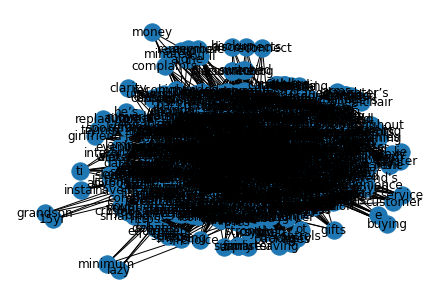

In [102]:
nx.draw_spring(P, with_labels=True)
plt.show()

In [104]:
keyword = list(nx.closeness_centrality(P).keys())
dgr = list(nx.degree_centrality(P).values())
btw = list(nx.betweenness_centrality(P).values())
cls = list(nx.closeness_centrality(P).values())

In [105]:
df = pd.DataFrame({'keyword':keyword, 'Degree Centrality': dgr, 'Betweenness Centrality': btw, 'Closeness Centrality' : cls})

In [106]:
df

,keyword,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,reluctant,0.035652,0.000000,0.493986
1,first,0.271304,0.004608,0.577309
2,talk,0.099130,0.000952,0.525354
3,hockey,0.058261,0.000139,0.512706
4,puck,0.058261,0.000139,0.512706
...,...,...,...,...
1146,catching,0.018261,0.000000,0.497405
1147,current,0.018261,0.000000,0.497405
1148,events,0.018261,0.000000,0.497405
1149,laughing,0.018261,0.000000,0.497405


In [110]:
df.sort_values(by=['Degree Centrality'], ascending=False)[:10]

,keyword,Degree Centrality,Betweenness Centrality,Closeness Centrality
18,echo,0.699130,0.062908,0.767690
57,alexa,0.651304,0.055216,0.740502
19,dot,0.622609,0.037157,0.725095
61,music,0.618261,0.049440,0.722816
132,one,0.565217,0.039905,0.696126
50,love,0.555652,0.033957,0.691106
64,set,0.530435,0.022422,0.679669
141,great,0.528696,0.034522,0.678867
8,use,0.512174,0.026578,0.671337
9,smart,0.492174,0.023573,0.662442


In [111]:
df.sort_values(by=['Betweenness Centrality'], ascending=False)[:10]

,keyword,Degree Centrality,Betweenness Centrality,Closeness Centrality
18,echo,0.699130,0.062908,0.767690
57,alexa,0.651304,0.055216,0.740502
61,music,0.618261,0.049440,0.722816
132,one,0.565217,0.039905,0.696126
19,dot,0.622609,0.037157,0.725095
141,great,0.528696,0.034522,0.678867
50,love,0.555652,0.033957,0.691106
8,use,0.512174,0.026578,0.671337
9,smart,0.492174,0.023573,0.662442
64,set,0.530435,0.022422,0.679669


In [112]:
df.sort_values(by=['Closeness Centrality'], ascending=False)[:10]

,keyword,Degree Centrality,Betweenness Centrality,Closeness Centrality
18,echo,0.699130,0.062908,0.767690
57,alexa,0.651304,0.055216,0.740502
19,dot,0.622609,0.037157,0.725095
61,music,0.618261,0.049440,0.722816
132,one,0.565217,0.039905,0.696126
50,love,0.555652,0.033957,0.691106
64,set,0.530435,0.022422,0.679669
141,great,0.528696,0.034522,0.678867
8,use,0.512174,0.026578,0.671337
9,smart,0.492174,0.023573,0.662442
